#Project - *Diabetes*

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Importing Pandas & Data file

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [171]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Statistical information of dataset

In [172]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for null-values & data type 

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Assigning values to variables

In [174]:
x = df.iloc[:,0:8].values
y = df.iloc[:,-1].values

Shapes of variable

In [21]:
x.shape

(768, 8)

In [22]:
y.shape

(768,)

Standardizing the values of x

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

Training the Model

In [23]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state= 0)

In [133]:
x_train = sc.fit_transform(x_train)

In [134]:
x_test = sc.fit_transform(x_test)

Importing Logistic Regression Classifier Algorithm

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
lc = LogisticRegression(random_state = 0)

Fitting the model

In [154]:
lc.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediting the model

In [155]:
y_lc = lc.predict(x_test)

In [156]:
y_lc

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Importing Confusion Matrix & Accuracy Score

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix

Confusion Matrix & Accuracy score of Logistic Regression algo

In [158]:
confusion_matrix(y_test, y_lc)

array([[94, 13],
       [18, 29]])

In [236]:
a_lc=accuracy_score(y_test, y_lc) 

Importing KNeighbors Classifier Algorithm

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

Fit the model

In [183]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predict the model

In [184]:
y_knn = knn.predict(x_test)

In [185]:
y_knn

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Confusion Matrix & Accuracy score of KNN algo

In [186]:
confusion_matrix(y_test,y_knn)

array([[96, 11],
       [17, 30]])

In [187]:
a_knn=accuracy_score(y_test,y_knn)

Importing SVM Classifier Algorithm

In [188]:
from sklearn.svm import SVC

In [189]:
svm = SVC(kernel = 'linear', random_state=0)

fit the model

In [190]:
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Predict the model

In [191]:
y_svm = svm.predict(x_test)

In [192]:
y_svm

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Confusion Matrix & Accuracy score of SVM algo

In [193]:
confusion_matrix(y_test, y_svm)

array([[96, 11],
       [18, 29]])

In [238]:
a_svm =accuracy_score(y_test,y_svm)

Importing DecisionTreeClassifier Algorithm

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)

Fit the data

In [249]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict the data

In [264]:
y_dtc = dtc.predict(x_test)

In [265]:
y_dtc

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

Accuracy score and confusion matrix for Decision Tree algo

In [266]:
a_dtc=accuracy_score(y_test,y_dtc)

In [267]:
confusion_matrix(y_test,y_dtc)

array([[78, 29],
       [17, 30]])

In [268]:
import matplotlib.pyplot as plt
import numpy as np

In [269]:
n= [0,25,50,100]
p= [a_dtc,a_lc,a_knn,a_svm] 
colors = np.random.rand(3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.71, 'DTC 70.6%')

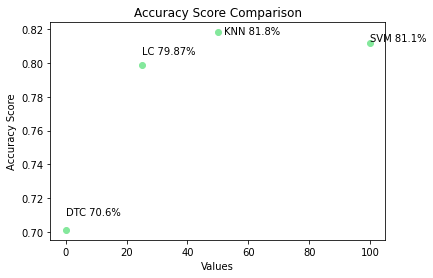

In [273]:
plt.scatter(n,p,c=colors)
plt.xlabel("Values")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score Comparison")
plt.annotate('KNN 81.8%', xy=(50, 0.818), xytext=(52, 0.817))
plt.annotate('LC 79.87%', xy=(25, 0.798), xytext=(25, 0.805))
plt.annotate('SVM 81.1%', xy=(100, 0.811), xytext=(100, 0.813))
plt.annotate('DTC 70.6%', xy=(0, 0.706), xytext=(0, 0.71))

#Conclusion

KNN Algo is 81.8% accurate in Classifying the dataset